In [2]:
from numpy import loadtxt
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd


In [3]:
dataset = pd.read_csv('../AirplaneDataset/train.csv')
dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
dataset.loc[dataset.satisfaction == 'satisfied', 'satisfaction'] = 1
dataset.loc[dataset.satisfaction == 'neutral or dissatisfied', 'satisfaction'] = 0

dataset.loc[dataset['Type of Travel'] == 'Business travel', 'Type of Travel'] = 1
dataset.loc[dataset['Type of Travel'] == 'Personal Travel', 'Type of Travel'] = 0

dataset.loc[dataset['Customer Type'] == 'Loyal Customer', 'Customer Type'] = 1
dataset.loc[dataset['Customer Type'] == 'disloyal Customer', 'Customer Type'] = 0

dataset.loc[dataset['Gender'] == 'Female', 'Gender'] = 1
dataset.loc[dataset['Gender'] == 'Male', 'Gender'] = 0

dataset.loc[dataset['Class'] == 'Business', 'Class'] = 2
dataset.loc[dataset['Class'] == 'Eco Plus', 'Class'] = 1
dataset.loc[dataset['Class'] == 'Eco', 'Class'] = 0

dataset['Customer Type'] = pd.to_numeric(dataset['Customer Type'])
dataset['Class'] = pd.to_numeric(dataset['Class'])
dataset['Type of Travel'] = pd.to_numeric(dataset['Type of Travel'])
dataset.Gender = pd.to_numeric(dataset.Gender)
dataset.satisfaction = pd.to_numeric(dataset.satisfaction)

rated_features = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

x_set = dataset[rated_features]
y_set = dataset.satisfaction

X_train, X_test, y_train, y_test = train_test_split(x_set, y_set, test_size=0.33, random_state=7)



In [5]:
model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

<h1> Building model using Train Set

In [6]:
y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 94.58%


<h1> Prediction Test Set

In [7]:
testcsv = pd.read_csv('../AirplaneDataset/test.csv')

testcsv.loc[testcsv.satisfaction == 'satisfied', 'satisfaction'] = 1
testcsv.loc[testcsv.satisfaction == 'neutral or dissatisfied', 'satisfaction'] = 0

testcsv.loc[testcsv['Type of Travel'] == 'Business travel', 'Type of Travel'] = 1
testcsv.loc[testcsv['Type of Travel'] == 'Personal Travel', 'Type of Travel'] = 0

testcsv.loc[testcsv['Customer Type'] == 'Loyal Customer', 'Customer Type'] = 1
testcsv.loc[testcsv['Customer Type'] == 'disloyal Customer', 'Customer Type'] = 0

testcsv.loc[testcsv['Gender'] == 'Female', 'Gender'] = 1
testcsv.loc[testcsv['Gender'] == 'Male', 'Gender'] = 0

testcsv.loc[testcsv['Class'] == 'Business', 'Class'] = 2
testcsv.loc[testcsv['Class'] == 'Eco Plus', 'Class'] = 1
testcsv.loc[testcsv['Class'] == 'Eco', 'Class'] = 0

testcsv['Customer Type'] = pd.to_numeric(testcsv['Customer Type'])
testcsv['Class'] = pd.to_numeric(testcsv['Class'])
testcsv['Type of Travel'] = pd.to_numeric(testcsv['Type of Travel'])
testcsv.Gender = pd.to_numeric(testcsv.Gender)
testcsv.satisfaction = pd.to_numeric(testcsv.satisfaction)

x_test = testcsv[rated_features]
y_test = testcsv.satisfaction
test_pred = model.predict(x_test)

test_predictions = [round(value) for value in test_pred]
# evaluate predictions

test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy: %.2f%%" % (test_accuracy * 100.0))

Accuracy: 94.59%


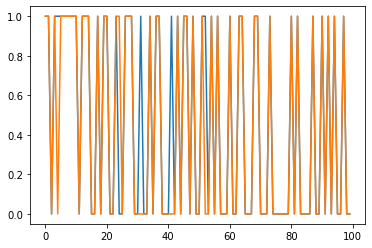

In [8]:
import matplotlib.pyplot as plt


plt.plot(y_test[0:100])
plt.plot(test_predictions[0:100])

plt.show()

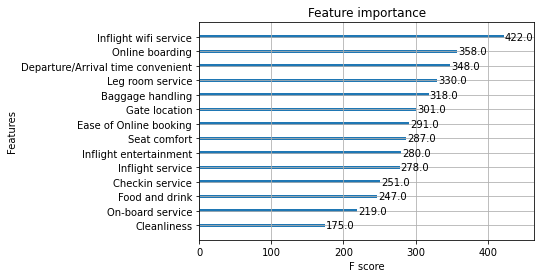

In [9]:
feature_importance = model.feature_importances_
plot_importance(model)
plt.show()

<h1> Main Method!

In [10]:
train=pd.read_csv('../AirplaneDataset/train.csv')
test=pd.read_csv('../AirplaneDataset/test.csv')

train=train.drop(['Unnamed: 0', 'id'],axis=1).reset_index(drop=True)
test=test.drop(['Unnamed: 0', 'id'],axis=1).reset_index(drop=True)
train.head()


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
def preprocess(data):
    
    data=data.dropna().reset_index(drop=True)
    label_list=['Gender','Customer Type','Type of Travel','Class','satisfaction']
    
    for i in label_list:
        y1=data[[i]].values.tolist()
        encoder=LabelEncoder()
        encoder.fit(y1)
        label1=encoder.transform(y1)
        data[i]=label1
        
    return data

In [12]:
train_clean=preprocess(train)
train_clean.info()

/Users/josefernan/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/josefernan/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int64  
 1   Customer Type                      103594 non-null  int64  
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  int64  
 4   Class                              103594 non-null  int64  
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

In [13]:
X = train_clean.drop('satisfaction',axis=1)
Y = train_clean['satisfaction']

In [16]:
from sklearn.model_selection import KFold
import numpy as np

kfold=KFold(n_splits=5)
cv_score=[]

x=X
y=Y
model=XGBClassifier()

n_iter=0
for train_index, test_index in kfold.split(x):
    x_train, x_test=x.iloc[train_index],x.iloc[test_index]
    y_train, y_test=y[train_index],y[test_index]
    
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    
    n_iter=n_iter+1
    
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_test=accuracy_score(y_test,y_pred_test)
    cv_score.append(acc_test)
    
    print("Modeling ",n_iter,"st")
    print('train set accuracy_score: ',acc_train)
    print('test set accuracy_score: ',acc_test)
    print("-----------------------------------------")
    
print('Mean test set accuracy_score: ',np.mean(cv_score))

Modeling  1 st
train set accuracy_score:  0.9774841628959277
test set accuracy_score:  0.9610985086152807
-----------------------------------------
Modeling  2 st
train set accuracy_score:  0.9773755656108597
test set accuracy_score:  0.9626912495776824
-----------------------------------------
Modeling  3 st
train set accuracy_score:  0.9756742081447963
test set accuracy_score:  0.9617259520247117
-----------------------------------------
Modeling  4 st
train set accuracy_score:  0.976289592760181
test set accuracy_score:  0.9642357256624354
-----------------------------------------
Modeling  5 st
train set accuracy_score:  0.9769776533616488
test set accuracy_score:  0.9639443961772372
-----------------------------------------
Mean test set accuracy_score:  0.9627391664114695


In [18]:
from sklearn.model_selection import GridSearchCV

model=XGBClassifier()
param={'max_depth':[3,5,8],'scale_pos_weight':[1,3,5],'n_estimators':[200,300],'min_child_weight':[1,2,3]}

grid_model=GridSearchCV(model,param_grid=param, cv=5,scoring='f1')
grid_model.fit(X,Y)
result1=pd.DataFrame(grid_model.cv_results_)

In [19]:
grid_model.best_params_

{'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 200,
 'scale_pos_weight': 1}

In [20]:
test_clean = preprocess(test)

X_test = test_clean.drop('satisfaction',axis=1)
Y_test = test_clean['satisfaction']

/Users/josefernan/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/josefernan/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
model = XGBClassifier(scale_pos_weight=1,max_depth=5,min_child_weight=3,n_estimators=200)
model.fit(X, Y)
pred = model.predict(X_test)

In [22]:
accuracy_score(Y_test,pred)

0.9628471015332329